In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

## **Context:**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

## **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

## **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

In [2]:
data = pd.read_csv('healthcare_data.csv')

In [3]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [5]:
nulls = data[data['health_conditions'].isnull()]
nulls

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
16,3,radiotherapy,E,Dr John,6,59508,31-40,Other,Urgent,Moderate,NaN,6,Yes,4067.512043,5
20,2,radiotherapy,E,Dr John,5,46808,21-30,Other,Urgent,Extreme,NaN,4,No,4938.861702,21
22,2,gynecology,F,Dr Nathan,0,24680,21-30,Female,Trauma,Minor,NaN,2,Yes,4496.932050,10
30,5,radiotherapy,E,Dr John,6,5170,21-30,Female,Emergency,Minor,NaN,4,Yes,3678.545078,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499971,5,gynecology,D,Dr Nathan,5,3808,31-40,Female,Emergency,Extreme,NaN,4,Yes,3850.524665,9
499973,2,gynecology,B,Dr Olivia,7,123996,21-30,Female,Emergency,Moderate,NaN,11,No,4174.032348,9
499979,3,radiotherapy,A,Dr Sam,4,41376,41-50,Male,Trauma,Extreme,NaN,2,No,4975.478643,7
499981,5,gynecology,D,Dr Olivia,3,14041,41-50,Female,Trauma,Moderate,NaN,4,No,3784.766600,8


In [6]:
data['health_conditions'] = data['health_conditions'].fillna("Other")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

<Axes: xlabel='Ward_Facility_Code', ylabel='count'>

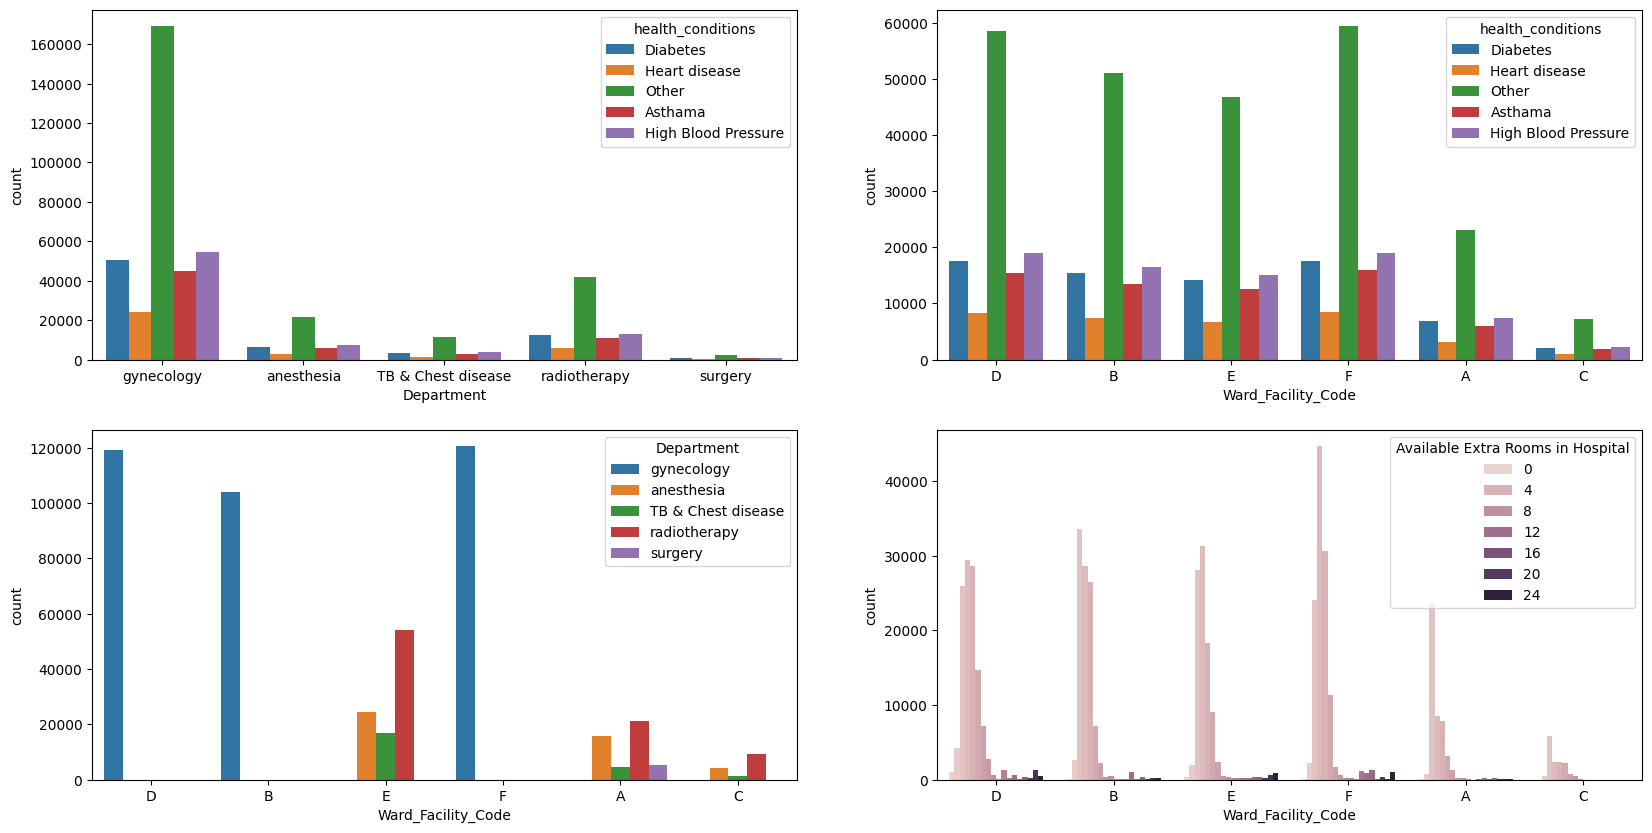

In [8]:
plt.figure(figsize= (20, 10))

plt.subplot(2,2,1)
sns.countplot(x = data['Department'], hue = 'health_conditions', data = data)

plt.subplot(2,2,2)
sns.countplot(x = data['Ward_Facility_Code'], hue = 'health_conditions', data = data)

plt.subplot(2,2,3)
sns.countplot(x = data['Ward_Facility_Code'], hue = 'Department', data = data)

plt.subplot(2,2,4)
sns.countplot(x = data['Ward_Facility_Code'], hue = 'Available Extra Rooms in Hospital', data = data)

In [9]:
data.Department.value_counts()

Department
gynecology            343478
radiotherapy           84315
anesthesia             44179
TB & Chest disease     22890
surgery                 5138
Name: count, dtype: int64

In [10]:
data.health_conditions.value_counts()

health_conditions
Other                  246299
High Blood Pressure     79402
Diabetes                73644
Asthama                 65514
Heart disease           35141
Name: count, dtype: int64

In [11]:
data['Stay (in days)'].value_counts()

Stay (in days)
9     124110
8     113462
10     53854
7      42292
6      21559
11     13577
5       9794
22      8893
23      8713
24      8299
21      7509
25      7128
20      6112
26      5777
19      5157
27      4625
18      4603
28      4203
29      3929
30      3764
32      3761
17      3735
31      3631
12      3431
33      3411
34      3129
35      2768
16      2756
36      2373
37      1933
15      1901
13      1650
38      1465
14      1374
4       1289
39      1122
40       868
41       648
42       433
43       328
44       218
45       172
46       119
47        55
48        36
3         18
49        11
50         3
51         2
Name: count, dtype: int64

<Axes: xlabel='Stay (in days)', ylabel='count'>

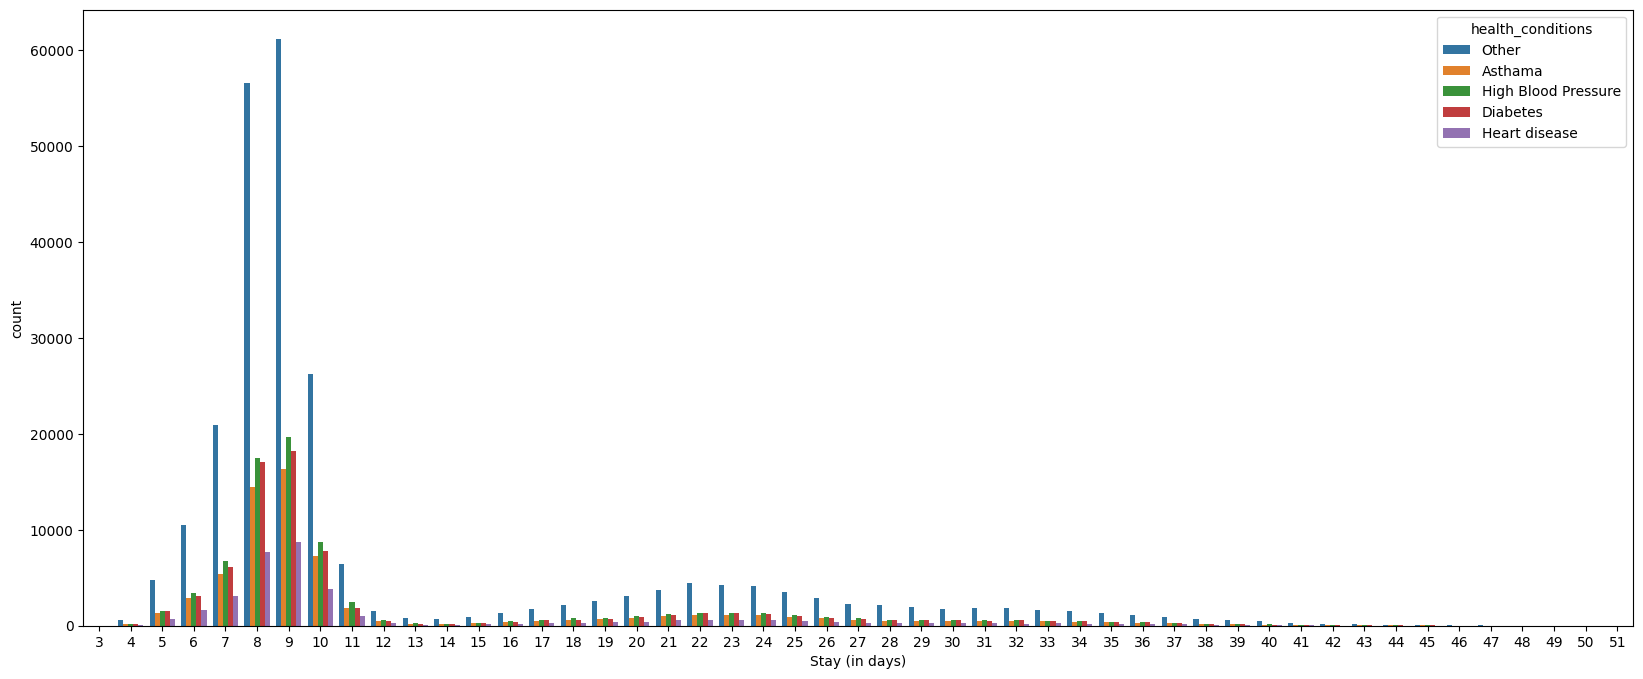

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x = data['Stay (in days)'], data = data, hue = 'health_conditions')

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


## Observations:
- The average stay is 12.4 days
- There are usually 5 staff available
- The average admission deposit is $4722.32
- It looks like the gyneocology department is very overloaded compared to other departments.

In [14]:
data_copy = data.copy()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

In [30]:
train_data = data.drop(['patientid', 'Stay (in days)'], axis = 1)
los = data['Stay (in days)']
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   Age                                500000 non-null  object 
 6   gender                             500000 non-null  object 
 7   Type of Admission                  500000 non-null  object 
 8   Severity of Illness                500000 non-null  object 
 9   health_conditions                  500000 non-null  object 
 10  Visitors with Patient              500000 non-null  int64  
 11  Insurance                          5000

In [31]:
train_data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,Other,4,No,4814.149231
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637


In [54]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),
        drop_first = False,
    )
    return x

In [63]:
train_dummy = encode_cat_vars(train_data)


In [64]:
from sklearn.model_selection import train_test_split

In [71]:
train, test_train, test, test_test = train_test_split(train_dummy, los, test_size = .2, random_state = 42)
print(train.shape)
print(test_train.shape)
print(test.shape)


(400000, 50)
(100000, 50)
(400000,)


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(train, test)

RandomForestRegressor(random_state=42)

In [75]:
pred = rf.predict(test_train)


In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
rmse = np.sqrt(mean_squared_error(test_test, pred))

print(rmse)
print(r2_score(test_test, pred))

1.3017217828706715
0.9729437122048402
